In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
from scipy.stats import randint
seed = 330
np.random.seed(seed)

In [262]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [263]:
import lightgbm as lgbm

In [264]:
pwd

'/Users/mattpucci/Desktop'

In [265]:
cd /Users/mattpucci/Desktop

/Users/mattpucci/Desktop


In [266]:
ls

2012-18_officialBoxScore.csv
2016-17_officialBoxScore.csv
2016-17_playerBoxScore.csv
2016-17_standings.csv
2016-17_teamBoxScore.csv
2017-18_officialBoxScore.csv
2017-18_playerBoxScore.csv
2017-18_standings.csv
2017-18_teamBoxScore.csv
Cover Letter.pdf
RCdata/
Restaurant Project Data/
Screen Shot 2020-04-08 at 11.07.10 AM.png
Screen Shot 2020-04-08 at 8.03.30 PM.png
UI Online - Doc_20200409083848.pdf
all_seasons.csv
eight.csv
five.csv
four.csv
nine.csv
one.csv
seven.csv
six.csv
teamBoxScore.csv
three.csv
two.csv
untitled folder/
~$ver Letter.docx


# Let's take an exploratory look at the NBA 2016-2017 team box score dataset and do some Preprocessing. 

In [267]:
df= pd.read_csv('2016-17_teamBoxScore.csv')
df.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,NY,...,84.9585,116.5653,87.6731,28.8922,0.4592,20.8951,2.0667,80.0000,100.3729,100.3729
1,2016-10-25,08:00,Regular,Lane,Karl,Adams,Bennie,Kennedy,Bill,CLE,...,41.6667,87.6731,116.5653,-28.8922,0.3478,12.9969,0.9444,33.3333,100.3729,99.9564
2,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,UTA,...,69.6653,122.1120,112.3863,9.7257,0.4699,18.3824,1.6923,38.4615,92.5380,92.1540
3,2016-10-25,10:00,Regular,Buchert,Nick,Callahan,Mike,Brown,Tony,POR,...,58.7137,112.3863,122.1120,-9.7257,0.4444,15.5687,1.3571,64.2857,92.5380,92.9252
4,2016-10-25,10:30,Regular,Maddox,Tre,Fraher,Pat,Crawford,Dan,SA,...,60.7884,101.2387,130.5979,-29.3592,0.4301,18.0560,1.5000,68.7500,98.7765,98.7765


In [268]:
date_value = pd.to_datetime(df['gmDate'], errors='coerce')
time_value = pd.to_datetime(df['gmTime'], errors='coerce')


df['year'] = date_value.dt.year 
df['month'] = date_value.dt.month 
df['day'] = date_value.dt.day 
df['hour'] = time_value.dt.hour 
df['minute'] = time_value.dt.minute

del df['gmDate']
del df['gmTime']

In [269]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()] 
df.drop(cols_with_missing, axis=1, inplace=True)
df_test.drop(cols_with_missing, axis=1, inplace=True)

In [270]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = df.columns.values.tolist()
for col in features:
    if df[col].dtype in numerics: continue
    categorical_columns.append(col)
indexer = {}
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    _, indexer[col] = pd.factorize(df[col])
    
for col in categorical_columns:
    if df[col].dtype in numerics: continue
    df[col] = indexer[col].get_indexer(df[col])

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 126 entries, seasTyp to minute
dtypes: float64(50), int64(76)
memory usage: 2.4 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d507a2d0>,
      dtype=object)

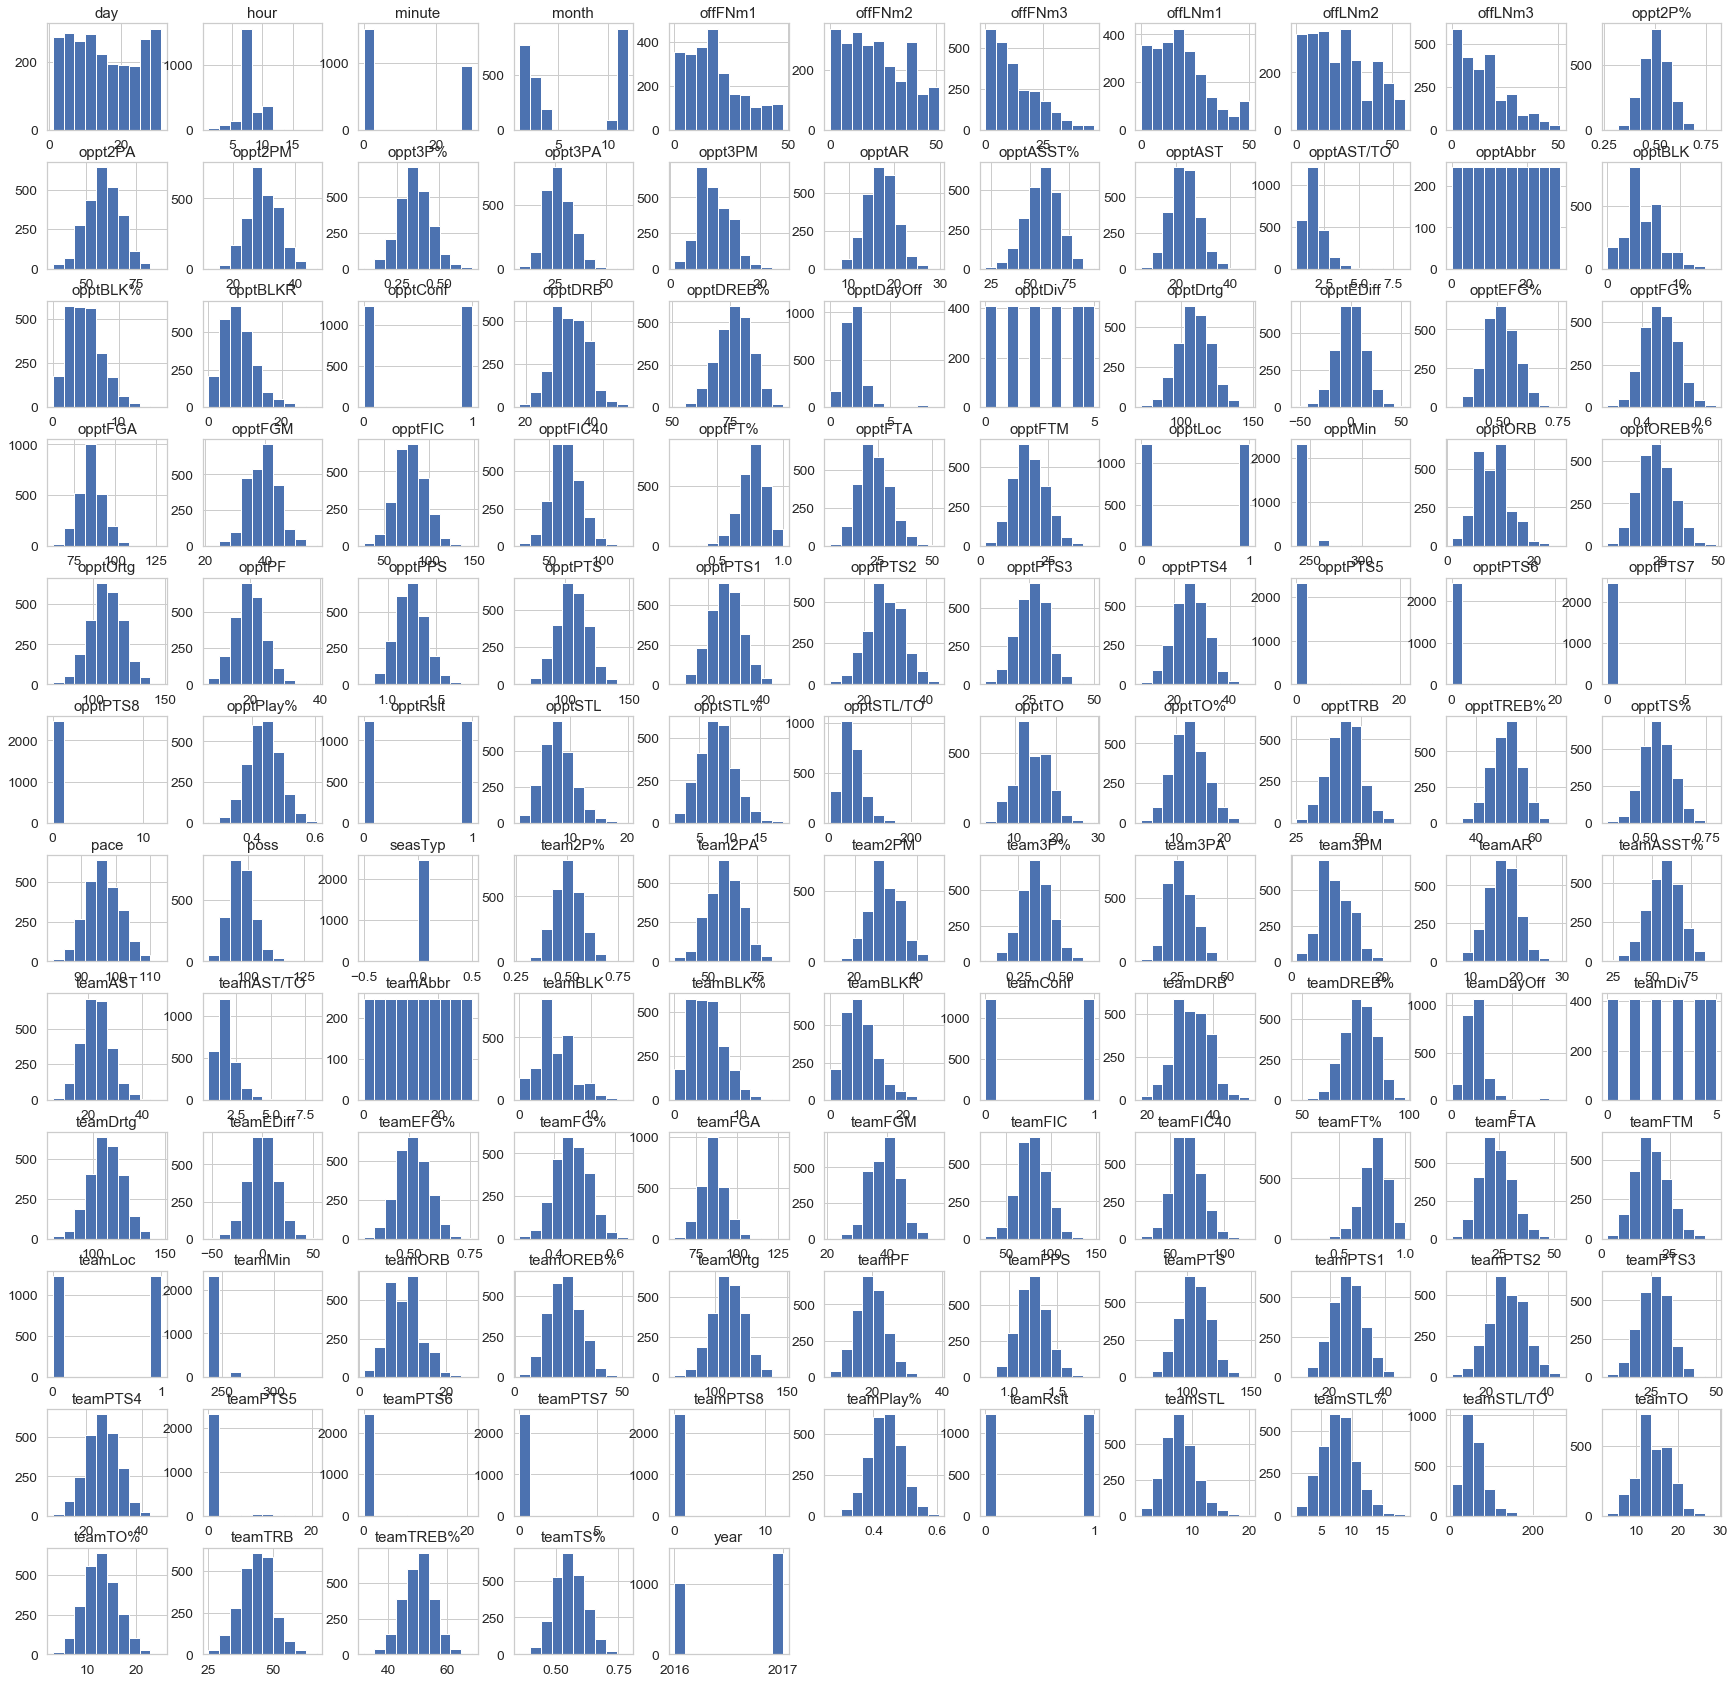

In [272]:
df.hist(figsize=(30,30))

## Not all of the data looks standardly distributed.  Let's now check and see if there are any strong correlations.

Text(0.5, 1, 'Figure 1: Seaborn Data Correlation Heat Map')

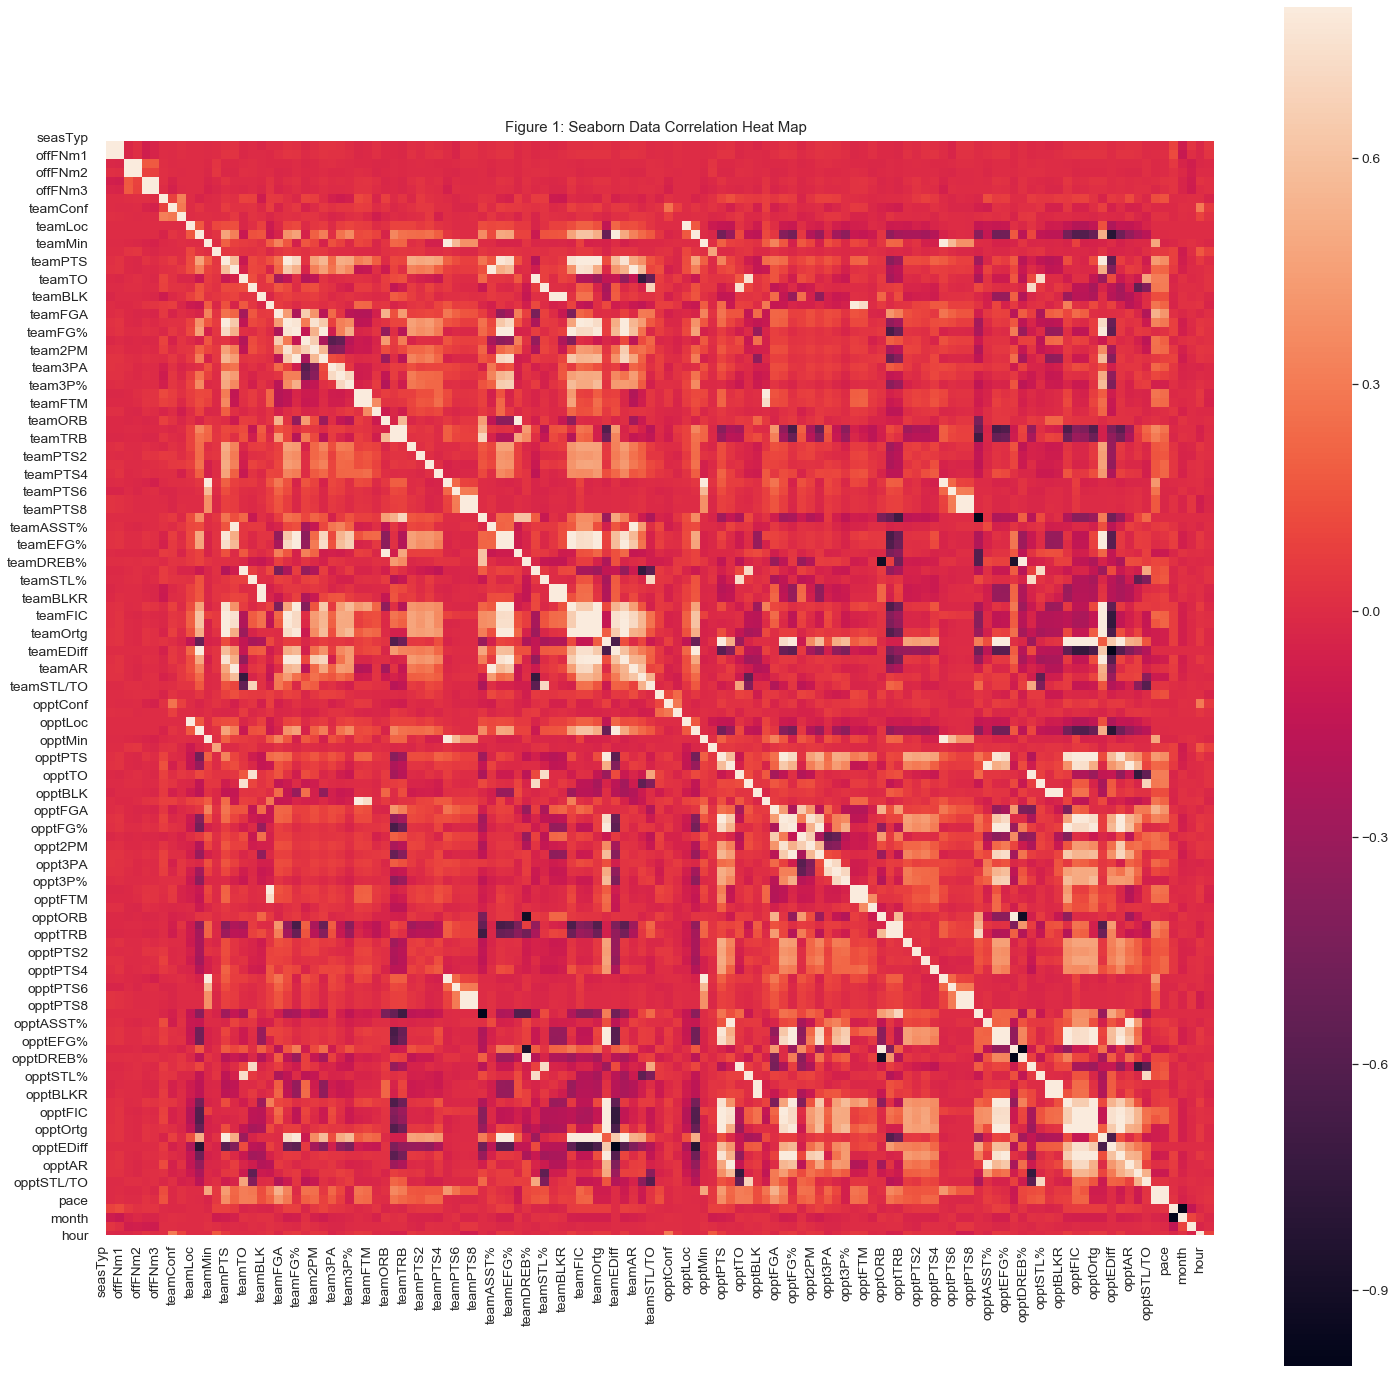

In [240]:
df_corr = df.corr()
f, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df_corr, vmax=.8, square=True).set_title('Figure 1: Seaborn Data Correlation Heat Map') 

### There is far too much going on in the above visual to make good sense of it.  Let's take a look at the 10 highest correlated features with more clarity.  

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
import pickle

In [273]:
df.teamRslt.value_counts()

1    1230
0    1230
Name: teamRslt, dtype: int64

In [274]:
df.teamRslt=df.teamRslt.map(lambda x: '0' if x=='Loss' else x)

In [275]:
df.teamRslt=df.teamRslt.map(lambda x: '1' if x=='Win' else x)

In [245]:
#Above we just converted a Loss to a value of 0, with a win a value of 1.

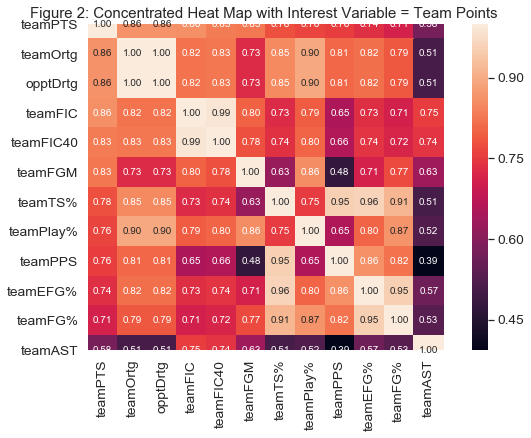

<Figure size 1800x1800 with 0 Axes>

In [246]:
k = 12
cols = df_corr.nlargest(k, 'teamPTS')['teamPTS'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Points ")
plt.figure(figsize=(25,25))
plt.show()

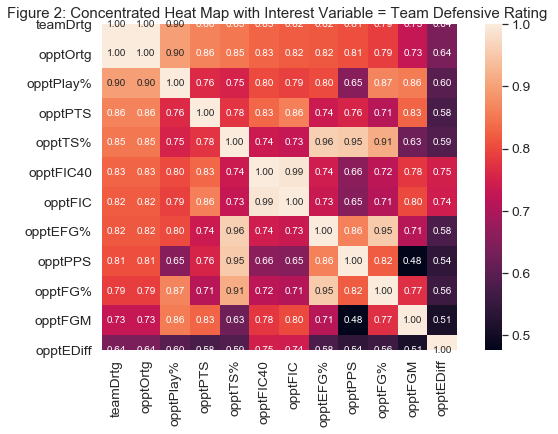

<Figure size 1800x1800 with 0 Axes>

In [247]:
k = 12
cols = df_corr.nlargest(k, 'teamDrtg')['teamDrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Defensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

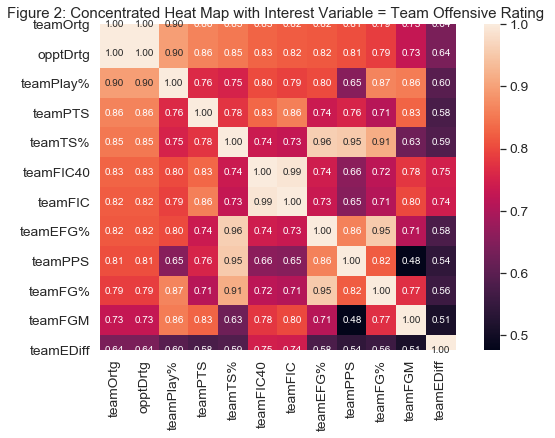

<Figure size 1800x1800 with 0 Axes>

In [248]:
k = 12
cols = df_corr.nlargest(k, 'teamOrtg')['teamOrtg'].index
f, ax = plt.subplots(figsize=(10,6))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
teampts_heat = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title("Figure 2: Concentrated Heat Map with Interest Variable = Team Offensive Rating ")
plt.figure(figsize=(25,25))
plt.show()

In [250]:
import statsmodels.api as sm  #statsmodels forward regression used to determine which features are the best fit based on P-Value.
import pandas as pd
import numpy as np
def forward_regression(X, y,
                       threshold_in=0.01,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
        if not changed:
            break
    return included

In [251]:
X = df
y = df.teamRslt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=47)
i = 1
results_df = pd.DataFrame()
predictors = list()
reg_score = list()
mse_diffs = list()
added_pred = list()
previous_columns = []

In [252]:
forward_regression(X,y)

['teamEDiff',
 'teamRslt',
 'opptDRB',
 'opptBLKR',
 'opptEDiff',
 'opptTO%',
 'opptRslt',
 'teamPTS6',
 'team2PM',
 'opptDREB%',
 'opptConf',
 'teamOrtg',
 'day',
 'opptDrtg',
 'teamDrtg',
 'opptOrtg',
 'opptOREB%',
 'teamTREB%',
 'offLNm3',
 'teamSTL/TO',
 'offLNm2',
 'opptTREB%',
 'opptMin',
 'pace',
 'teamFTA',
 'teamFIC40',
 'team3PA',
 'opptSTL/TO',
 'opptPTS2',
 'opptFIC',
 'teamConf',
 'opptAST',
 'offFNm2',
 'opptASST%',
 'offLNm1',
 'opptAbbr',
 'oppt3PA',
 'teamPTS4',
 'teamPF',
 'minute',
 'teamAbbr',
 'opptPTS',
 'opptPTS4',
 'teamBLKR',
 'opptPF',
 'opptPTS5',
 'offFNm1',
 'opptFIC40',
 'teamOREB%',
 'teamDREB%']

In [276]:
df_test = pd.read_csv('2017-18_teamBoxScore.csv')

In [277]:
y = df['teamRslt']

drop = ['teamRslt', 'opptRslt', 'teamEDiff', 'teamFIC', 'opptEDiff', 'opptFIC']

df.drop(drop, axis=1, inplace=True)

x = df;

In [278]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.4, random_state=2)

In [279]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1476, 120)
(984, 120)
(1476,)
(984,)


In [282]:
import lightgbm as lgbm
train_set= lgbm.Dataset(x_train, y_train, silent=False)
valid_set = lgbm.Dataset(x_test, y_test, silent=False)

params = {
        'boosting_type':'gbdt', 'objective': 'regression', 'num_leaves': 31,
        'learning_rate': 0.05, 'max_depth': -1, 'subsample': 0.8,
        'bagging_fraction' : 1, 'max_bin' : 5000 , 'bagging_freq': 20,
        'colsample_bytree': 0.6, 'metric': 'rmse', 'min_split_gain': 0.5,
        'min_child_weight': 1, 'min_child_samples': 10, 'scale_pos_weight':1,
        'zero_as_missing': True, 'seed':0,        
    }

Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 0.342405
[20]	valid_0's rmse: 0.260931
[30]	valid_0's rmse: 0.221513
[40]	valid_0's rmse: 0.206017
[50]	valid_0's rmse: 0.198037
[60]	valid_0's rmse: 0.193843
[70]	valid_0's rmse: 0.193439
[80]	valid_0's rmse: 0.193439
[90]	valid_0's rmse: 0.193439
[100]	valid_0's rmse: 0.193439
[110]	valid_0's rmse: 0.193439
Early stopping, best iteration is:
[66]	valid_0's rmse: 0.193439


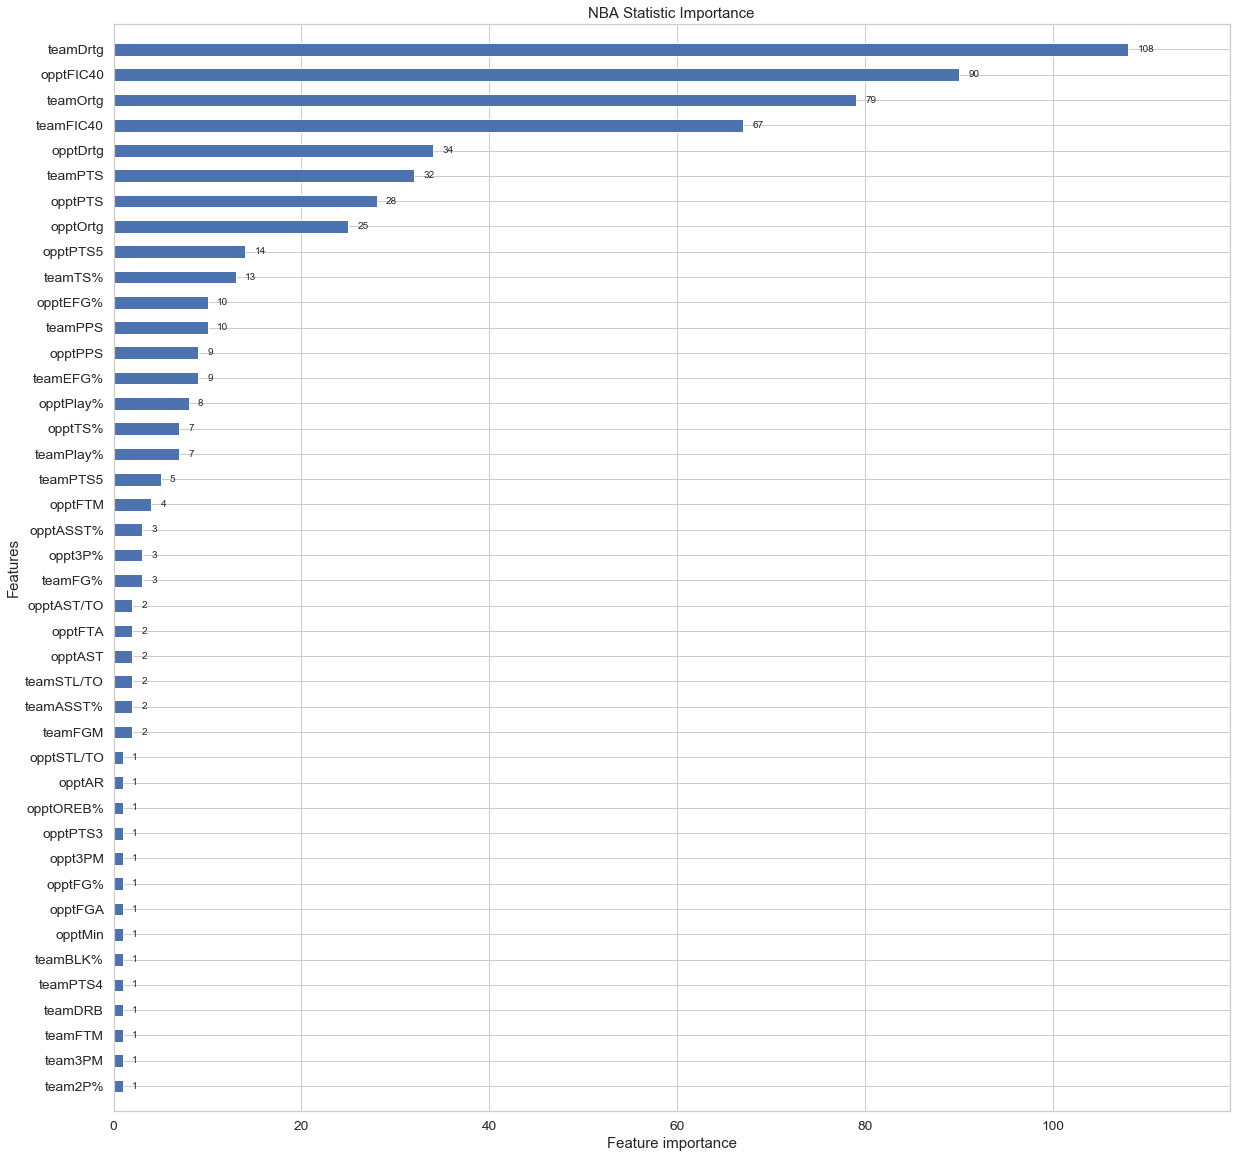

In [285]:
model1 = lgbm.train(params, train_set = train_set, num_boost_round=1000,early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

fig =  plt.figure(figsize = (20,20))
axes = fig.add_subplot(111)
lgbm.plot_importance(model1,ax = axes,height = 0.5)
plt.title('NBA Statistic Importance')
plt.show();

### The above gives us a good visual representation of stat importance in relation to winning a game. 

In [286]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, pred))
print(knn.predict_proba(x_test))

0.8770325203252033
[[0.8 0.2]
 [1.  0. ]
 [0.  1. ]
 ...
 [0.2 0.8]
 [0.6 0.4]
 [0.8 0.2]]


In [290]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [291]:
print(clf.feature_importances_)

[0.         0.00209606 0.00293559 0.00053132 0.00058775 0.00149702
 0.00252277 0.00115424 0.00018089 0.00118425 0.00037271 0.0005994
 0.00096304 0.01900204 0.01172862 0.00152995 0.00239297 0.00347928
 0.00170453 0.00261882 0.01407175 0.0089089  0.0033436  0.00024094
 0.01421892 0.00196078 0.00132474 0.01968672 0.00574211 0.00168613
 0.00123939 0.00111818 0.00678493 0.00630205 0.00083001 0.00369509
 0.00198881 0.00221679 0.00263618 0.         0.         0.
 0.01087017 0.00272731 0.03084558 0.0047209  0.00081315 0.00200007
 0.00397042 0.0021562  0.00092728 0.00147415 0.03371218 0.10811235
 0.04966636 0.03774359 0.03514352 0.00922966 0.00448193 0.00371084
 0.00091495 0.00038402 0.00060985 0.0003616  0.00125224 0.00134938
 0.01426421 0.01192077 0.00443813 0.00205451 0.00252619 0.00287411
 0.00152626 0.00765868 0.02974193 0.0038378  0.00340876 0.00186572
 0.00229603 0.00124854 0.01812727 0.00333395 0.0048544  0.00316533
 0.00178889 0.00736586 0.0078597  0.00394007 0.00124601 0.01067306
 0.0

In [292]:
pred = clf.predict(x_test)
print(metrics.accuracy_score(y_test, pred))

0.9136178861788617
